In [118]:
#Projeto para predição de Doenças Renais utilizando Árvores de Decisão

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

#Leitura do dataset
data= pd.read_csv('dados/kidney_disease.csv')
data


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [119]:
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


MUDANDO NOME DAS COLUNAS

In [120]:
Colunas={"bp":"blood_pressure","sg":"specific_gravity", "al":"albumin","su":"sugar","rbc":"red_blood_cells","pc":"pus_cell",
         "pcc":"pus_cell_clumps","ba":"bacteria","bgr":"blood_glucose_random","bu":"blood_urea","sc":"serum_creatinine",
         "sod":"sodium","pot":"potassium","hemo":"haemoglobin","pcv":"packed_cell_volume","wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count","htn":"hypertension","dm":"diabetes_mellitus","cad":"coronary_artery_disease",
          "appet":"appetite","pe":"pedal_edema","ane":"anemia"}

In [121]:
#Alterando o nome da colunas
data.rename(columns=Colunas, inplace=True)

In [122]:
data


,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [123]:
#identificando valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [ ]:
#Trocando os string por numeros, anormal = 1 normal = 0  present = 1 naopresente = 0 entre outros

In [124]:
data[['red_blood_cells','pus_cell']] = data[['red_blood_cells','pus_cell']].replace(to_replace={'abnormal':1,'normal':0})
data[['pus_cell_clumps','bacteria']] = data[['pus_cell_clumps','bacteria']].replace(to_replace={'present':1,'notpresent':0})
data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']] = data[['hypertension','diabetes_mellitus','coronary_artery_disease','pedal_edema','anemia']].replace(to_replace={'yes':1,'no':0})
data[['appetite']] = data[['appetite']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace(to_replace='\tno',value=0)
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

In [125]:
data

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [126]:
data['pedal_edema'] = data['pedal_edema'].replace(to_replace='good',value=0) 
data['appetite'] = data['appetite'].replace(to_replace='no',value=0)
data['coronary_artery_disease']=data['coronary_artery_disease'].replace('yes',1)

In [185]:
del data['id']

In [186]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin,packed_cell_volume
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.000000,...,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,15.4,44
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,148.036517,...,5.2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.3,38
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.000000,...,5.2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,9.6,31
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.000000,...,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0,11.2,32
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.000000,...,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0,11.6,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.000000,...,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.7,47
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,...,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.5,54
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.000000,...,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.8,49
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.000000,...,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,14.2,51


# Limpando os dados nulos e colocando a média

In [187]:
data['age']=data['age'].fillna(np.mean(data['age']))
data['blood_pressure']=data['blood_pressure'].fillna(np.mean(data['blood_pressure']))
data['albumin']=data['albumin'].fillna(np.mean(data['albumin']))

In [188]:
data['specific_gravity']=data['specific_gravity'].fillna(np.mean(data['specific_gravity']))
data['sugar']=data['sugar'].fillna(np.mean(data['sugar']))
data['blood_glucose_random']=data['blood_glucose_random'].fillna(np.mean(data['blood_glucose_random']))
data['blood_urea']=data['blood_urea'].fillna(np.mean(data['blood_urea']))
data['serum_creatinine']=data['serum_creatinine'].fillna(np.mean(data['serum_creatinine']))
data['haemoglobinhaemoglobin']=data['haemoglobin'].fillna(np.mean(data['haemoglobin']))
data['potassium']=data['potassium'].fillna(np.mean(data['potassium']))
data['sodium']=data['sodium'].fillna(np.mean(data['sodium']))

In [189]:
data = data.replace("\t?", np.nan)
data = data.replace(" ?", np.nan)
data = data.fillna(method='ffill')
data = data.fillna(method='backfill')

In [190]:
data.info() #verificando que os dados nao contem mais dados nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [191]:
data["packed_cell_volume"] = pd.to_numeric(data.packed_cell_volume , errors='coerce')
data["white_blood_cell_count"] = pd.to_numeric(data.white_blood_cell_count , errors='coerce')
data["red_blood_cell_count"] = pd.to_numeric(data.red_blood_cell_count , errors='coerce') #transformando os objects em numeros

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    float64
 6   pus_cell                 400 non-null    float64
 7   pus_cell_clumps          400 non-null    float64
 8   bacteria                 400 non-null    float64
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [193]:
#ESTATISTICA DESCRITIVA
data.describe() 

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin,packed_cell_volume
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.272500,0.227500,0.105000,0.055000,148.036517,...,4.473000,0.367500,0.34250,0.085000,0.795000,0.190000,0.150000,0.625000,12.332250,37.750000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.445803,0.419743,0.306937,0.228266,74.782634,...,1.009117,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729,2.925625,9.125002
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000,9.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,...,3.800000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,10.200000,31.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,...,4.500000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000,12.400000,38.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,1.000000,0.000000,0.000000,0.000000,150.000000,...,5.200000,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,14.800000,44.250000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,17.800000,54.000000


In [194]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification', 'haemoglobinhaemoglobin',
       'packed_cell_volume '],
      dtype='object')

In [195]:
data.corr().round(3) #olhando a correlação dos dados

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,classification,haemoglobinhaemoglobin,packed_cell_volume
age,1.000,0.148,-0.181,0.115,0.208,0.108,0.144,0.159,0.044,0.214,...,-0.205,0.393,0.363,0.233,-0.158,0.094,0.051,0.225,-0.216,-0.253
blood_pressure,0.148,1.000,-0.182,0.147,0.201,0.202,0.160,0.060,0.112,0.149,...,-0.208,0.270,0.228,0.087,-0.178,0.054,0.195,0.291,-0.303,-0.316
specific_gravity,-0.181,-0.182,1.000,-0.467,-0.288,-0.350,-0.342,-0.291,-0.221,-0.326,...,0.480,-0.367,-0.393,-0.155,0.247,-0.272,-0.213,-0.699,0.545,0.522
albumin,0.115,0.147,-0.467,1.000,0.268,0.294,0.505,0.400,0.368,0.326,...,-0.466,0.482,0.378,0.237,-0.331,0.441,0.282,0.599,-0.516,-0.497
sugar,0.208,0.201,-0.288,0.268,1.000,0.136,0.168,0.151,0.108,0.639,...,-0.153,0.293,0.472,0.247,-0.081,0.131,0.066,0.328,-0.213,-0.214
red_blood_cells,0.108,0.202,-0.350,0.294,0.136,1.000,0.230,0.102,0.123,0.189,...,-0.309,0.267,0.280,0.136,-0.246,0.233,0.152,0.474,-0.380,-0.334
pus_cell,0.144,0.160,-0.342,0.505,0.168,0.230,1.000,0.476,0.314,0.268,...,-0.432,0.316,0.274,0.198,-0.301,0.345,0.256,0.420,-0.457,-0.441
pus_cell_clumps,0.159,0.060,-0.291,0.400,0.151,0.102,0.476,1.000,0.275,0.198,...,-0.257,0.196,0.165,0.188,-0.190,0.104,0.176,0.265,-0.265,-0.256
bacteria,0.044,0.112,-0.221,0.368,0.108,0.123,0.314,0.275,1.000,0.086,...,-0.193,0.089,0.080,0.162,-0.149,0.135,0.052,0.187,-0.193,-0.188
blood_glucose_random,0.214,0.149,-0.326,0.326,0.639,0.189,0.268,0.198,0.086,1.000,...,-0.238,0.370,0.501,0.212,-0.176,0.102,0.127,0.401,-0.265,-0.262


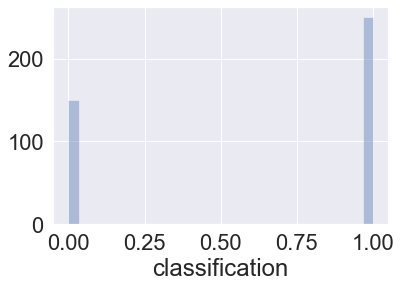

In [196]:
sns.distplot(data['classification'], bins=30, kde= False )

In [197]:
X = data.iloc[:,:-1].values
y = data.iloc[:,24].values

In [198]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0) #criando o treino e o teste, utilizando 30% de teste e 70% para o treino

In [199]:
from sklearn import tree #utilizando arvore de decisão para o modelo de predição 

In [200]:
classificador_arvore = tree.DecisionTreeClassifier()
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [201]:
plano_previsto = classificador_arvore.predict(X_teste)



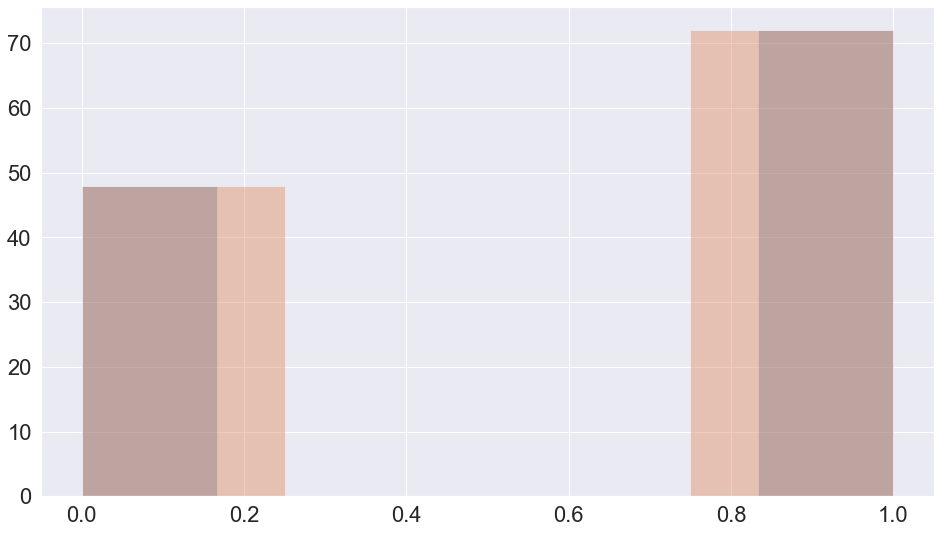

In [202]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [203]:
from sklearn.metrics import accuracy_score #verificando a acurracy

In [204]:
accuracy_score(y_teste, plano_previsto)*100

100.0

In [205]:
plano_previsto

array([1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0.])

In [206]:
#Simulador

In [211]:
df = data[['blood_urea','serum_creatinine','sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count']]
df

,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count
0,36.0,1.2,137.528754,4.627244,15.4,44,7800
1,18.0,0.8,137.528754,4.627244,11.3,38,6000
2,53.0,1.8,137.528754,4.627244,9.6,31,7500
3,56.0,3.8,111.000000,2.500000,11.2,32,6700
4,26.0,1.4,137.528754,4.627244,11.6,35,7300
...,...,...,...,...,...,...,...
395,49.0,0.5,150.000000,4.900000,15.7,47,6700
396,31.0,1.2,141.000000,3.500000,16.5,54,7800
397,26.0,0.6,137.000000,4.400000,15.8,49,6600
398,50.0,1.0,135.000000,4.900000,14.2,51,7200


In [208]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification', 'haemoglobinhaemoglobin',
       'packed_cell_volume '],
      dtype='object')

In [216]:
age=47
blood_pressure=70
specific_gravity=1.17
albumin=1.27
sugar=2
red_blood_cells=1
pus_cell=1
pus_cell_clumps=0
bacteria=0
blood_glucose_random=120
blood_urea=30
serum_creatinine=3
sodium=138
potassium=4
haemoglobin=15
packed_cell_volume=30
white_blood_cell_count=6000
red_blood_cell_count=5.0
hypertension=1
diabetes_mellitus=1
coronary_artery_disease=0
appetite=1
pedal_edema=1
anemia=0
haemoglobinhaemoglobin=15
packed_cell_volume=44
entrada=[[age, blood_pressure, specific_gravity, albumin, sugar,
       red_blood_cells, pus_cell, pus_cell_clumps, bacteria,
       blood_glucose_random, blood_urea, serum_creatinine, sodium,
       potassium, haemoglobin, packed_cell_volume,
       white_blood_cell_count, red_blood_cell_count, hypertension,
       diabetes_mellitus, coronary_artery_disease, appetite,
       pedal_edema, anemia, haemoglobinhaemoglobin,
       packed_cell_volume]]
  

In [217]:
simulador = classificador_arvore.predict(entrada)

In [218]:
simulador

array([1.])